# Steps
## Models: 
- System model
## Simulations:
- command signal generation

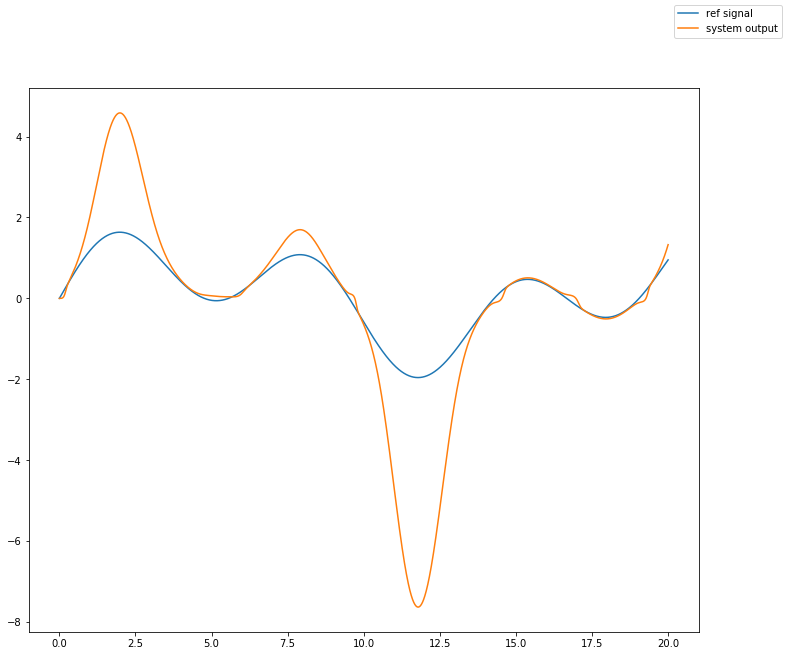

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def system(uk,yk):
    return uk**3+yk/(1+yk**2)

### signal data
tmin = 0
tmax = 20
sfreq = 200
k = np.linspace(tmin,tmax,(tmax-tmin)*sfreq)
yd = np.sin(3*np.pi*k/25)+np.sin(3*np.pi*k/10)
y = np.zeros(len(k))
for k_i in range(len(k)-1):
    y[k_i+1] = system(yd[k_i],y[k_i])


### Visualization
plt.plot(k,yd,label='ref signal')
plt.plot(k,y,label='system output')
fig=plt.gcf()
fig.set_size_inches((12,10))
fig.legend()

In [1]:
# NN controller
class RNN():
    '''
    single output RNN
    '''
    
    def __init__(self,num_neurons=[2,6]):
        self.W_input_hidden = np.random.uniform(low=-1,high=1,size = (num_neurons[1],num_neurons[0]) )
        self.W_hidden_output = np.random.uniform(low=-1,high=1,size = (1,num_neurons[1]) )
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def d_sigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    def relu(self,X):
        return np.maximum(0,X)
    def forward(self,X):
        hidden_activation = np.array([self.sigmoid(np.dot(X,self.W_input_hidden[i])) for i in range(self.W_input_hidden.shape[0])])
        return np.dot(hidden_activation,self.W_hidden_output[0])
    def hidden_activation (self,X):
        return np.array([self.sigmoid(np.dot(X,self.W_input_hidden[i])) for i in range(self.W_input_hidden.shape[0])])



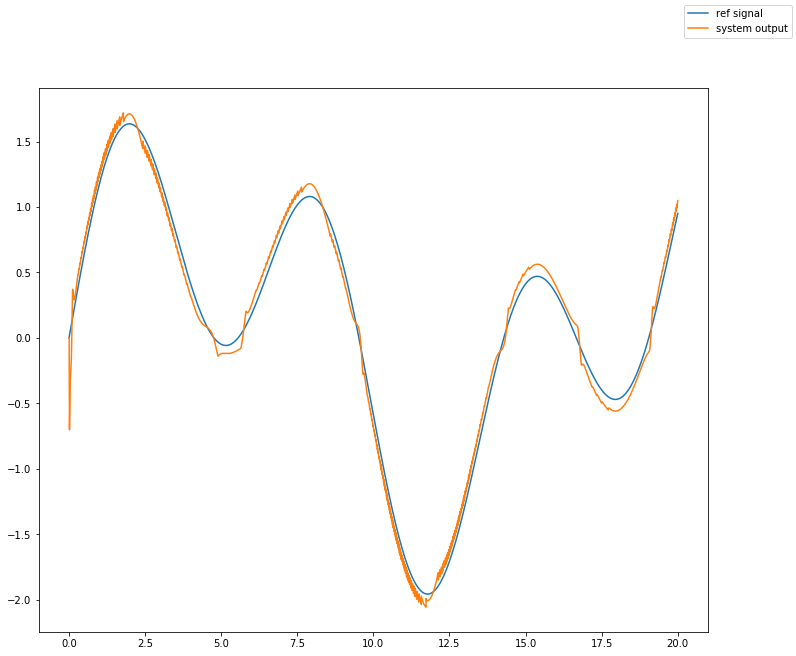

In [8]:
# Simulation
from IPython.core.debugger import set_trace
import numpy as np
def system(uk,yk):
    return uk**3+yk/(1+yk**2)
mod = RNN([2,6])
### signal data
tmin = 0
tmax = 20
sfreq = 200
recurrent_step = 2
k = np.linspace(tmin,tmax,(tmax-tmin)*sfreq)
yd = np.sin(3*np.pi*k/25)+np.sin(3*np.pi*k/10)
y = np.zeros(len(k))
y_RNN = np.zeros(len(k))
u = np.zeros(len(k))
s = np.zeros(len(k)) # tracking error
e = np.zeros(len(k))
kv=0.5
lr = 0.2 #learning rate
s_tol = 0.1 # tolerence of s
y[1]=system(yd[1],y[0])
s[1]=y[1]-yd[1]
e[1]=s[1]-kv*s[0]
for k_i in range(2,len(k)): 
#     set_trace()
    y_RNN[k_i-1] = mod.forward(np.array([u[k_i-2],y_RNN[k_i-2]]))
    u[k_i-1]=-y_RNN[k_i-1]+yd[k_i]+kv*s[1]
    y[k_i] = system(u[k_i-1],y[k_i-1]) 
    s[k_i] = y[k_i]-yd[k_i]# tracking error
    e[k_i] = s[k_i] -kv*s[k_i-1]
    if np.abs(s[k_i]) > s_tol:
#         set_trace()
        mod.W_hidden_output += lr*e[k_i]*mod.hidden_activation(np.array([u[k_i-2],y_RNN[k_i-2]]))
        mod.W_input_hidden += lr*e[k_i]*np.dot((mod.W_hidden_output[0]*mod.d_sigmoid(np.dot(mod.W_input_hidden,np.array([u[k_i-2],y_RNN[k_i-2]]))))[:,None],
                                               np.array([u[k_i-2],y_RNN[k_i-2]])[None,:]) 
### Visualization
import matplotlib.pyplot as plt
plt.plot(k,yd,label='ref signal')
plt.plot(k,y,label='system output')
fig=plt.gcf()
fig.set_size_inches((12,10))
fig.legend()        

In [14]:
mod = RNN()
mod.d_sigmoid(np.array([2,2])) 

array([0.10499359, 0.10499359])